# INTRODUCTION TO DATA INGESTION FROM CLOUD STORAGE

In data ingestion from cloud storage, raw files are efficiently converted into Delta tables using Databricks tools—unlocking advanced management and analytics capabilities within the Lakehouse.

## DATA INGESTION PATTERNS FROM CLOUD OBJECT STORAGE

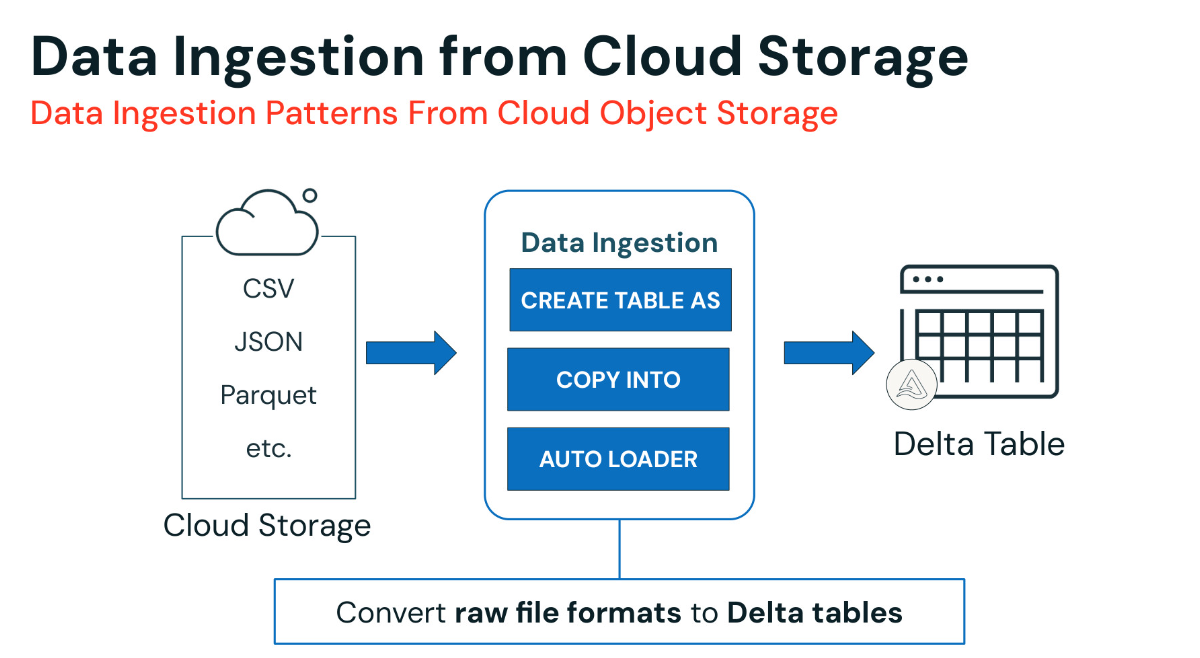

> Data ingestion is a critical component of modern Lakehouse architecture, enabling organizations to take advantage of large volumes of data stored in cloud object storage systems. 

Common file formats like CSV, JSON, and Parquet are frequently used due to their flexibility and ease of use.

Our goal is to convert these raw files into Delta tables, unlocking advanced functionality such as ACID transactions, time travel, and schema enforcement.

We'll explore three primary methods for ingesting files from cloud object storage into Delta tables:
- CREATE TABLE AS (CTAS)
- COPY INTO
- Auto Loader
Ingestion from cloud object storage is performed using Lakeflow Connect Standard Connectors.

## CREATE TABLE AS - CTAS



In [ ]:
create table as new_table as 
select *
from read_files (
--path_file--
format => 'csv',
format_options ()
;

###

### METHOD 1 - BATCH - CREATE TABLE AS (CTAS) 

> Creates a Delta table by default from files stored in cloud object storage.

<mark>The read_files() function </mark> is used to read files from a specified location and return the data in a tabular format. It offers several capabilities:

- Supports various file formats, including JSON, CSV, XML, TEXT, BINARYFILE, PARQUET, AVRO, and ORC.
- Automatically detects the file format and infers a unified schema across all files.
- Allows you to specify format-specific options for greater control when reading source files.
Can be used in streaming tables to incrementally ingest files into Delta Lake using Auto Loader. We will learn more about Auto - Loader shortly.

### METHOD 2 - INCREMENTAL BATCH - COPY INTO (LEGACY)

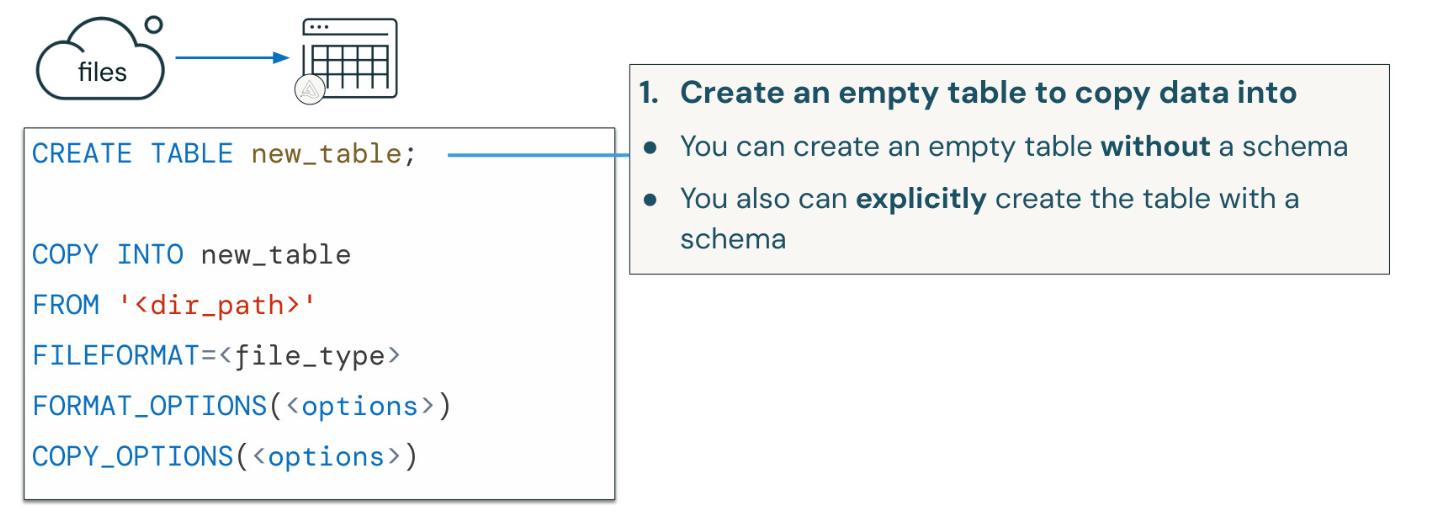

> `COPY INTO` is ideal for situations where the cloud storage location is continuously adding files, since it is a retriable and idempotent operation designed for incremental batch ingestion.

What that means is: `COPY INTO` will skip any files that have already been loaded into the table, and only new files will be ingested.
Now, let's go over some of the key aspects of `COPY INTO`:

- It supports various common file types like Parquet, JSON, XML, and others.
- The FROM clause specifies the path of the cloud storage location where new files are being continuously added.
`FORMAT_OPTIONS()` controls how the source files are parsed and interpreted, and the available options will depend on the file format you're working with.
- And finally, COPY_OPTIONS() lets you control the behavior of the COPY INTO operation itself. For example, options like schema evolution using mergeSchema, or idempotency using force.

### DATA INGESTION FROM CLOUD STORAGE
> Method 3 - Incremental Batch or Streaming - Auto Loader

- Incrementally and efficiently processes new data files (in batch or streaming) as they arrive in cloud storage without any additional setup.
- Auto Loader has support for both Python and SQL (leveraging Declarative Pipelines)
- You can use Auto Loader to process billions of files
- Auto Loader is built upon Spark Structured Streaming

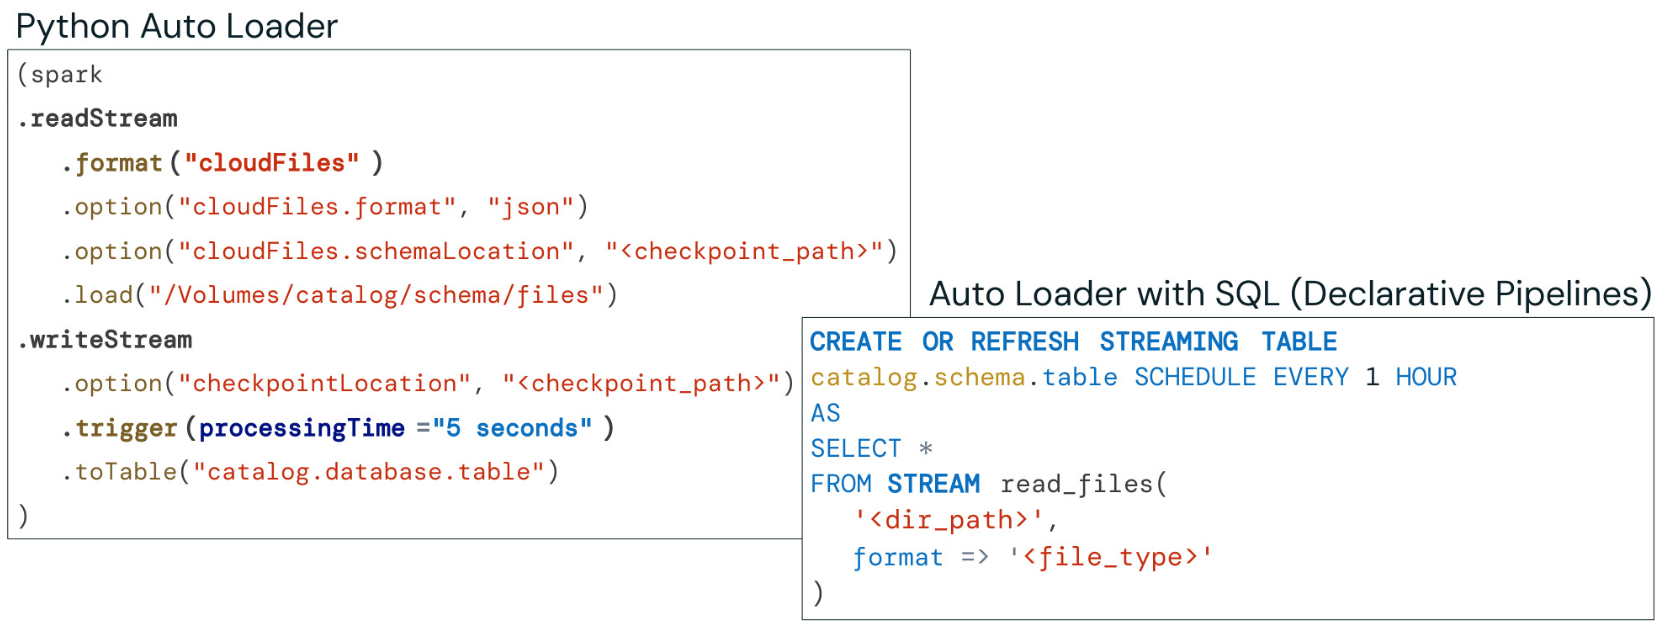

#### AUTO LOADER IN PYTHON TO READ STREAMING DATA FROM CLOUD STORAGE:
- We start with .readStream and set the format to "cloudFiles", which enables Auto Loader.
Then, we specify the file format as JSON, and define the schema location using cloudFiles.schemaLocation, which is used to track schema inference and evolution.
- Next, we use .load() to point to the location of the files, in this case a path under /Volumes referencing Unity Catalog.
- On the write side, we configure .writeStream with a checkpoint location to maintain state and progress, and set a trigger interval - of every 5 seconds.
- Finally, we use .toTabIe() to write the data into a Delta table specified by catalog, database, and table name.

## AUTO LOADER WITH DATABRICKS SQL

- Databricks recommends using streaming tables to ingest data with Databricks SQL (instead of COPY INTO). A streaming table is a table registered to Unity Catalog that includes additional support for streaming or incremental data processing. When you create a streaming table, a pipeline is automatically generated for it. Streaming tables can be used for incremental data loading from both Kafka and cloud object storage.

- To create a streaming table from files in a volume, you use Auto Loader. Databricks recommends using Auto Loader with Lakeflow Declarative Pipelines for most data ingestion tasks from cloud object storage. Together, Auto Loader and Declarative Pipelines are designed to incrementally and idempotently load continuously growing datasets as they arrive.

- Streaming tables in Databricks SQL are backed by serverless Lakeflow Declarative Pipelines. Your workspace must support serverless pipelines to use this functionality. Alternatively, you can build your own Lakeflow Declarative Pipelines for incremental processing, optimization, and monitoring. Declarative Pipelines offer a range of additional features, which you can learn more about here: https://docs.databricks.com/aws/en/dlt/

- To use Auto Loader in Databricks SQL, use the read files function with the STREAM keyword in the FROM clause.


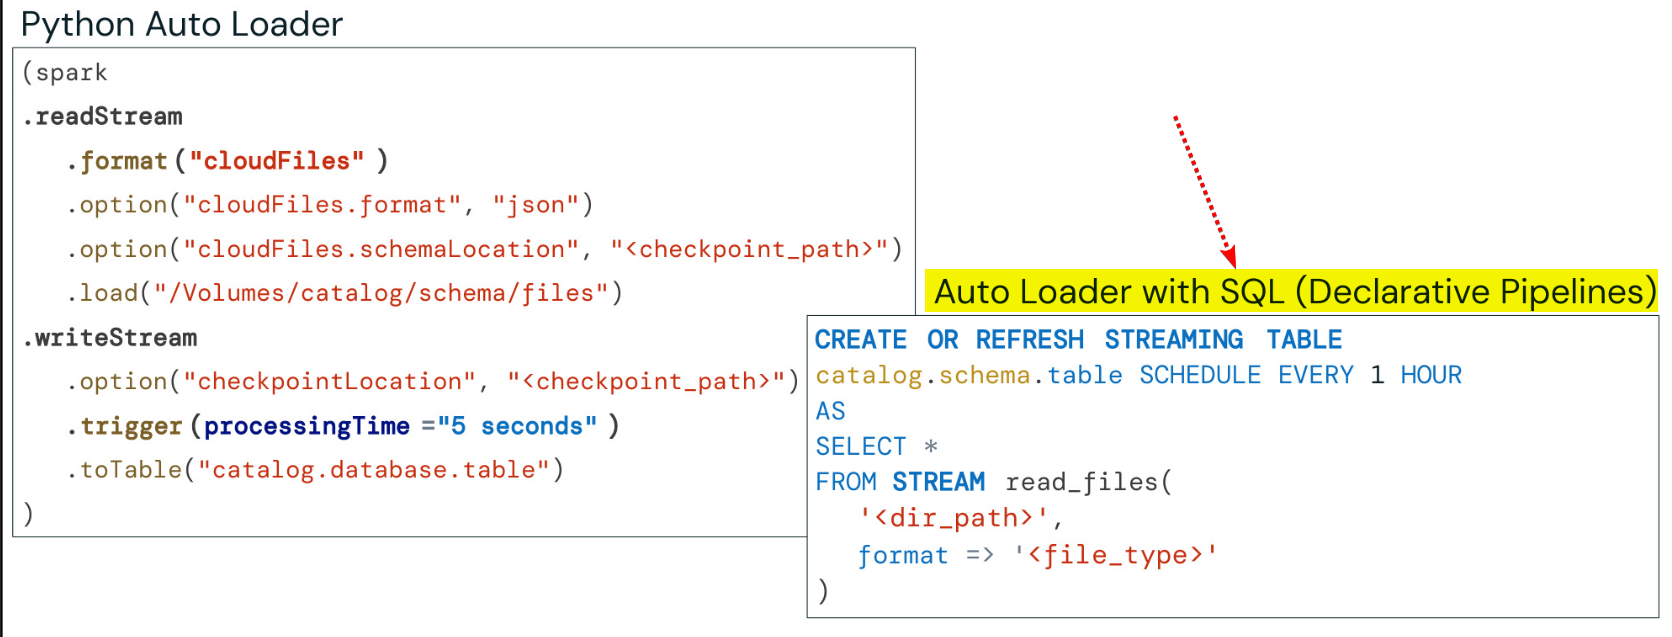

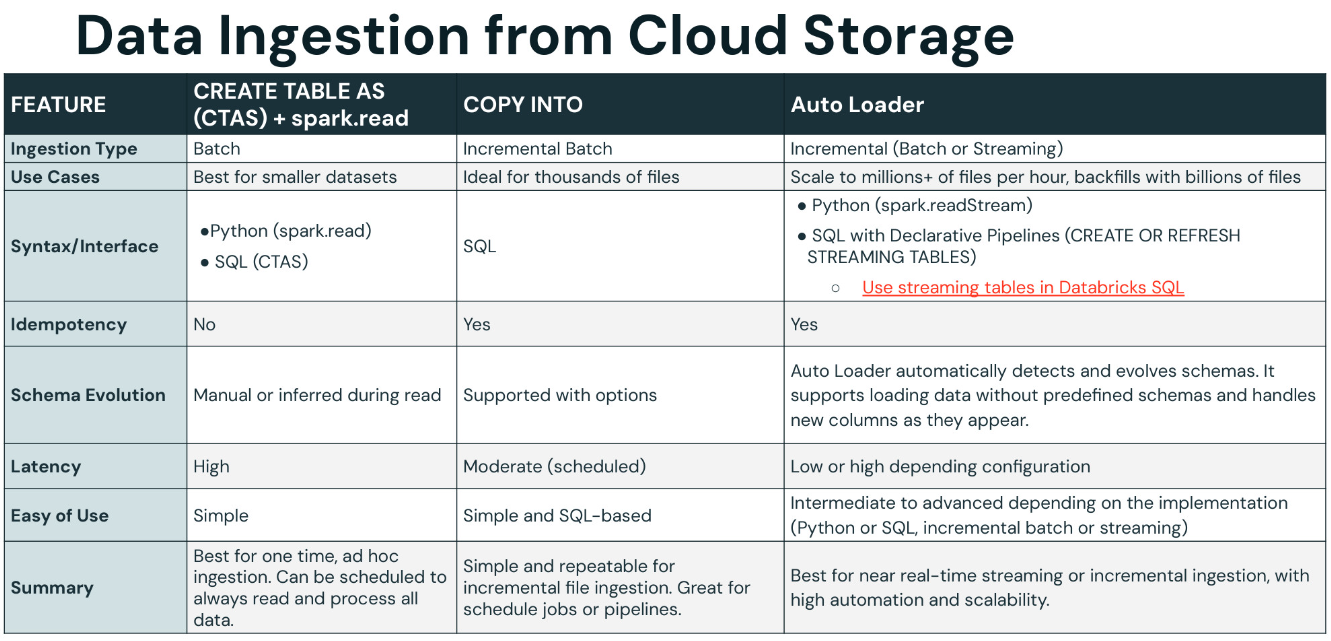